# Beginners Exercise: Bayesian computation with Stan and Farmer Jöns

Solutions to the problems of the [Bayesian computation with Stan and Farmer Jöns](http://www.sumsar.net/files/posts/2017-01-15-bayesian-computation-with-stan-and-farmer-jons/stan_exercise.html) challenge by Rasmus Bååth. If you're more comfortable with RStan, you can find the original solutions [here](http://www.sumsar.net/files/posts/2017-01-15-bayesian-computation-with-stan-and-farmer-jons/stan_exercise_answers.html).

In [1]:
%matplotlib inline

import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/gianluca/.virtualenvs/bayes/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


## 1. Getting started

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e34ceab136e62f17019cddb53a3f3df1 NOW.


Inference for Stan model: anon_model_e34ceab136e62f17019cddb53a3f3df1.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta1   0.25  3.4e-3   0.12   0.06   0.16   0.24   0.33   0.53   1287    1.0
theta2   0.59  3.7e-3   0.13   0.32    0.5   0.59   0.69   0.84   1321    1.0
lp__   -15.93    0.03   1.04 -18.84 -16.31 -15.61  -15.2 -14.92   1060    1.0

Samples were drawn using NUTS at Sun Jan 22 12:23:57 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


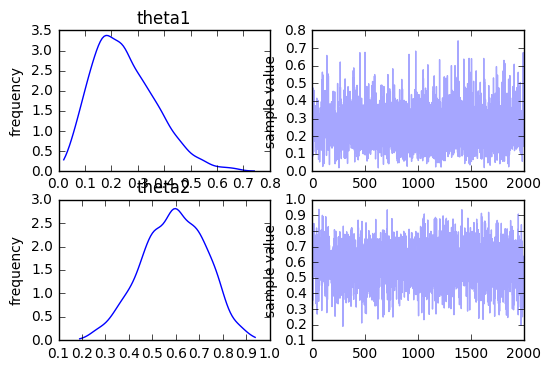

In [2]:
model = """
data {
  int n1;      // trials
  int n2;      // trials
  int y1[n1];  // successes
  int y2[n2];  // successes
}
parameters {
  real<lower=0, upper=1> theta1;
  real<lower=0, upper=1> theta2;
}
model {  
  theta1 ~ beta(1, 1);
  theta2 ~ beta(1, 1);
  y1 ~ bernoulli(theta1);
  y2 ~ bernoulli(theta2); 
}
"""

y1 = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
y2 = [0, 0, 1, 1, 1, 0, 1, 1, 1, 0]
data = {
    'y1': y1,
    'y2': y2,
    'n1': len(y1),
    'n2': len(y2)
}

# Compiling and producing posterior samples from the model.
fit = pystan.stan(model_code = model, data = data,
                           iter=1000, chains=4)

# Plotting and summarizing the posterior distribution
print(fit)
fit.plot()
plt.show()

# 2. Manipulating samples

Calculate the probability that the difference between the two underlying rates is smaller than 0.2.

In [3]:
np.mean(fit.extract(permuted=True)['theta1'] < fit.extract(permuted=True)['theta2'])

0.95699999999999996

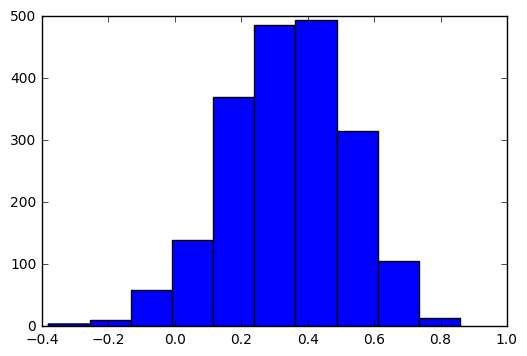

In [4]:
plt.hist(fit.extract(permuted=True)['theta2'] - fit.extract(permuted=True)['theta1'])
plt.show()

In [5]:
np.mean(abs(fit.extract(permuted=True)['theta2'] - fit.extract(permuted=True)['theta1']) < 0.2)

0.21249999999999999

# 3. Cows and disease

Jöns now wants to know: How effective are the drugs? What is the evidence that medicine A is better or worse than medicine B?

Inference for Stan model: anon_model_e34ceab136e62f17019cddb53a3f3df1.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta1   0.25  2.8e-3   0.11   0.07   0.16   0.24   0.32   0.51   1637    1.0
theta2   0.58  3.5e-3   0.13   0.32   0.49   0.59   0.68   0.83   1437    1.0
lp__   -15.86    0.04   0.96 -18.46 -16.23 -15.55 -15.18 -14.93    740    1.0

Samples were drawn using NUTS at Sun Jan 22 12:23:58 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


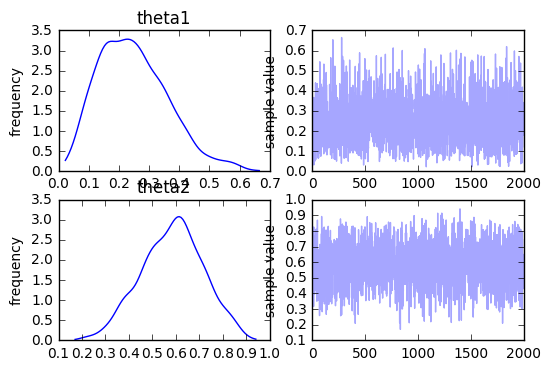

In [6]:
cowA = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
cowB = [0, 0, 1, 1, 1, 0, 1, 1, 1, 0]

data = {
    'y1': cowA,
    'y2': cowB,
    'n1': len(cowA),
    'n2': len(cowB)
}

fit2 = pystan.stan(fit=fit, data=data,
                   iter=1000, chains=4)
print(fit2)
fit2.plot()
plt.show()

In [7]:
# evidence that drug B is more effective than drug A
np.mean(fit2.extract(permuted=True)['theta2'] > fit2.extract(permuted=True)['theta1'])

0.96650000000000003

# 4. Cows and milk

Jöns now wants to know: Was the diet any good, does it results in better milk production?

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a501455d8b3a9e850d22a3a92de49fbf NOW.


Inference for Stan model: anon_model_a501455d8b3a9e850d22a3a92de49fbf.
4 chains, each with iter=3000; warmup=1500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]    618.32    1.02  52.26 515.25 586.41 617.62 648.53 721.31   2645    1.0
mu[1]    596.04    1.17  63.01 468.74  556.2  596.5  635.2 723.02   2920    1.0
sigma[0] 156.96     1.4  49.17  93.73 124.36 146.57  177.0 284.18   1233    1.0
sigma[1] 248.62    1.12  51.02 172.73  213.1 240.17 275.05 371.74   2082    1.0
lp__     -143.9    0.05   1.76 -148.3 -144.8 -143.4 -142.6 -141.7   1324    1.0

Samples were drawn using NUTS at Sun Jan 22 12:24:36 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


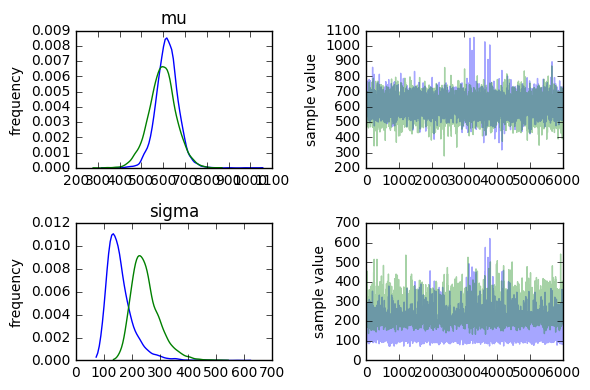

In [8]:
diet_milk = [651, 679, 374, 601, 401, 609, 767, 709, 704, 679]
normal_milk = [798, 1139, 529, 609, 553, 743, 151, 544, 488, 555, 257, 692, 678, 675, 538]

milk = []
start = [1]
for idx, sublist in enumerate([diet_milk, normal_milk]):
    start.extend([start[idx] + len(sublist)])
    milk.extend(sublist)

model = """
data {
    int<lower=1> groups;
    int start[groups+1];
    int length;
    real milk[length];
}
parameters {
    real mu[groups];
    real sigma[groups];
}
model {
    for (i in 1:groups) {
        sigma[i] ~ uniform(0, 1000);
        mu[i] ~ uniform(0, 2000);
        milk[start[i]:start[i+1]-1] ~ normal(mu[i], sigma[i]);    
    }
}
"""

data = {
    'groups': 2,
    'length': len(milk),
    'start': start,
    'milk': milk
}

fit3 = pystan.stan(model_code=model, data=data,
                   iter=3000, chains=4)

print(fit3)
fit3.plot()
plt.tight_layout()
plt.show()

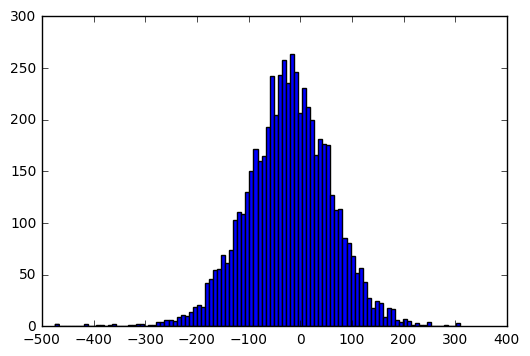

In [9]:
mu1 = fit3.extract(permuted=True)['mu'][:,0]
mu2 = fit3.extract(permuted=True)['mu'][:,1]

diff = mu2 - mu1
plt.hist(diff, bins=100)
plt.show()

In [10]:
# probability that diet B is better than diet A
np.mean(diff > 0)

0.39116666666666666

# 5. Cows and Mutant Cows

Jöns now wants to know: Was the diet any good, does it results in better milk production for non-mutant cows?

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d8e3a6ffba11c7f71a9ab6ffb2be107f NOW.


Inference for Stan model: anon_model_d8e3a6ffba11c7f71a9ab6ffb2be107f.
4 chains, each with iter=3000; warmup=1500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]    658.88    3.67  145.2 384.36 576.89 648.46 731.36 1001.4   1567    1.0
mu[1]    556.15    1.42  70.17 411.24 512.39 557.19 602.89 693.77   2430    1.0
sigma[0] 424.74    5.63 201.45 151.75 268.37 379.24  544.6 897.92   1280    1.0
sigma[1] 244.84    1.38  64.66 141.17 199.57 236.81 279.67 401.02   2209    1.0
lp__     -178.4    0.05   1.57 -182.1 -179.3 -178.1 -177.2 -176.2   1130    1.0

Samples were drawn using NUTS at Sun Jan 22 12:25:14 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


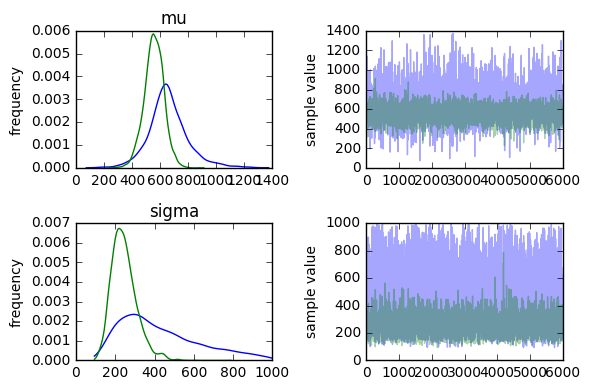

In [11]:
diet_milk = [651, 679, 374, 601, 4000, 401, 609, 767, 3890, 704, 679]
normal_milk = [798, 1139, 529, 609, 553, 743, 3,151, 544, 488, 15, 257, 692, 678, 675, 538]

milk = []
start = [1]
for idx, sublist in enumerate([diet_milk, normal_milk]):
    start.extend([start[idx] + len(sublist)])
    milk.extend(sublist)

model = """
data {
    int<lower=1> groups;
    int start[groups+1];
    int length;
    real milk[length];
}
parameters {
    real mu[groups];
    real sigma[groups];
}
model {
    for (i in 1:groups) {
        sigma[i] ~ uniform(0, 1000);
        mu[i] ~ uniform(0, 2000);
        milk[start[i]:start[i+1]-1] ~ student_t(3, mu[i], sigma[i]);    
    }
}
"""

data = {
    'groups': 2,
    'length': len(milk),
    'start': start,
    'milk': milk
}

fit4 = pystan.stan(model_code=model, data=data,
                   iter=3000, chains=4)

print(fit4)
fit4.plot()
plt.tight_layout()
plt.show()

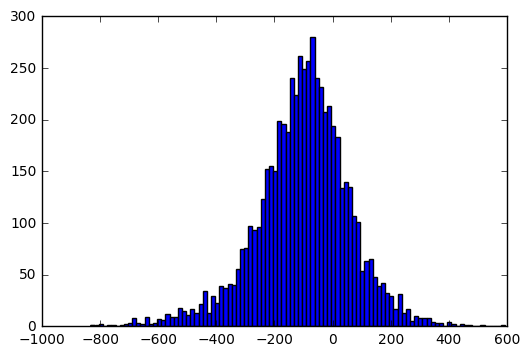

In [12]:
mu1 = fit4.extract(permuted=True)['mu'][:,0]
mu2 = fit4.extract(permuted=True)['mu'][:,1]

diff = mu2 - mu1
plt.hist(diff, bins=100)
plt.show()

In [13]:
# probability that diet B is better than diet A 
np.mean(diff > 0)

0.23833333333333334

# 6. Chickens and diet

Jöns now wants to know: Was the diet any good, does it result in the chickens producing more eggs?

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1a10d164332986759d356024db9a4154 NOW.


Inference for Stan model: anon_model_1a10d164332986759d356024db9a4154.
4 chains, each with iter=3000; warmup=1500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda[0]    3.3  9.2e-3   0.55   2.33   2.89   3.27   3.64   4.46   3527    1.0
lambda[1]   1.91  6.5e-3   0.41    1.2   1.62   1.87   2.16    2.8   4021    1.0
lp__       -1.72    0.02   0.98  -4.39  -2.08  -1.44  -1.03  -0.76   3250    1.0

Samples were drawn using NUTS at Sun Jan 22 12:25:54 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


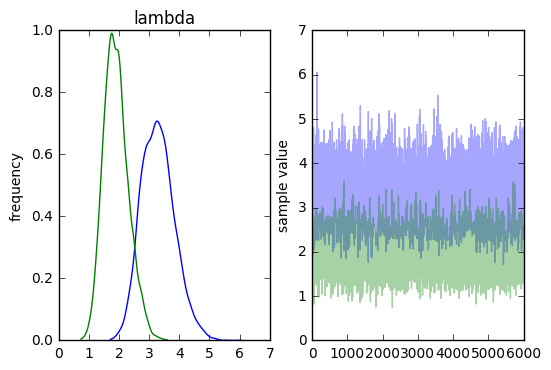

In [14]:
diet_eggs = [6, 4, 2, 3, 4, 3, 0, 4, 0, 6, 3]
normal_eggs = [4, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1]

eggs = []
start = [1]
for idx, sublist in enumerate([diet_eggs, normal_eggs]):
    start.extend([start[idx] + len(sublist)])
    eggs.extend(sublist)

model = """
data {
    int groups;           // # groups
    int chickens;         // # chickens
    int start[groups+1];  // starting points to slice y array   
    int y[chickens];             // eggs produced by each chicken
}
parameters {
    real<lower=0> lambda[groups];
}
model {
    for (i in 1:groups) {
        lambda[i] ~ uniform(0, 8);
        y[start[i]:start[i+1]-1] ~ poisson(lambda[i]);
    }
}
"""

data = {
    'groups': 2,
    'chickens': len(eggs),
    'start': start,
    'y': eggs
}

fit5 = pystan.stan(model_code=model, data=data,
                   iter=3000, chains=4)
print(fit5)
fit5.plot()
plt.show()

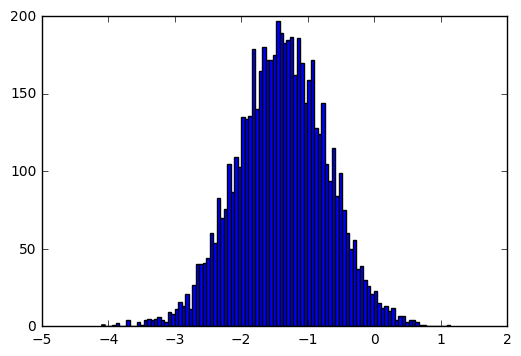

In [15]:
diet = fit5.extract(permuted=True)['lambda'][:,0]
normal = fit5.extract(permuted=True)['lambda'][:,1]

diff = normal - diet

plt.hist(diff, bins=100)
plt.show()

In [16]:
# probability that new diet is better than the normal 
np.mean(diff < 0)

0.98016666666666663

# 7. Cows and milk in a different data format

Modify the model from (4) to work with this data format instead.

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_07a497daac71c9501a659cb59216f2b0 NOW.


Inference for Stan model: anon_model_07a497daac71c9501a659cb59216f2b0.
4 chains, each with iter=3000; warmup=1500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]    616.92    0.88  47.76 518.61 588.08 617.55 647.25 709.87   2952    1.0
mu[1]    595.98     1.1  61.12 474.93  555.3  595.3 635.83 716.15   3061    1.0
sigma[0] 152.28    0.88  40.89  95.21 123.81 144.43 172.32  251.5   2182    1.0
sigma[1] 249.29    1.01  50.81 172.61 212.95 242.15 277.51 370.61   2535    1.0
lp__     -143.7    0.03   1.55 -147.5 -144.5 -143.4 -142.6 -141.7   1992    1.0

Samples were drawn using NUTS at Sun Jan 22 12:26:33 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


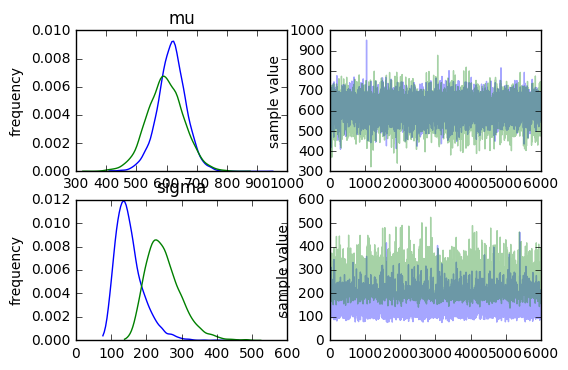

In [17]:
frame = pd.DataFrame({'milk': [651, 679, 374, 601, 401, 609, 767, 709, 704, 679, 798, 1139,
                               529, 609, 553, 743, 151, 544, 488, 555, 257, 692, 678, 675, 538],
                     'group': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                               2, 2, 2]})

data = {
    'groups': frame.group.nunique(),
    'cows': len(frame.milk),
    'group': list(frame.group),
    'milk': list(frame.milk)    
}

model = """
data {
    int<lower=1> groups;  // # diets
    int<lower=1> cows;    // # cows
    int group[cows];    // group each cow belongs to
    real milk[cows];      // milk produced by each cow
}
parameters {
    real mu[groups];
    real sigma[groups];
}
model {
    for (cow in 1:cows) {
        sigma[group[cow]] ~ uniform(0, 1000);
        mu[group[cow]] ~ uniform(0, 2000);
        milk[cow] ~ normal(mu[group[cow]], sigma[group[cow]]);    
    }
}
"""

fit6 = pystan.stan(model_code=model, data=data,
                   iter=3000, chains=4)
print(fit6)
fit6.plot()
plt.show()

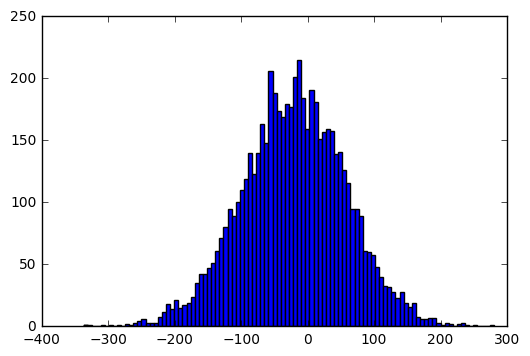

In [18]:
diet = fit6.extract(permuted=True)['mu'][:,0]
normal = fit6.extract(permuted=True)['mu'][:,1]

difference = normal - diet
plt.hist(difference, bins=100)
plt.show()

In [19]:
# probability new diet is more effective
np.mean(diff < 0)

0.98016666666666663

# 8. Cows and more diets

Now Jöns now wants to know: Which diet seems best, if any? How much more milk should he be expecting to produce using the best diet compared to the others?



Inference for Stan model: anon_model_07a497daac71c9501a659cb59216f2b0.
4 chains, each with iter=3000; warmup=1500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]     616.7    0.94  49.55 517.91 586.78  616.9 646.99 715.97   2751    1.0
mu[1]    595.16    1.12  63.64 470.78 554.59 594.57 635.23 723.52   3200    1.0
mu[2]    733.77    1.02  58.19 618.38 697.58 733.76 771.22 847.72   3235    1.0
sigma[0] 153.35    0.94  42.05  93.99 123.68 145.78 173.71 255.72   2020    1.0
sigma[1]  251.2    1.28  53.39 172.17 213.04 242.32 280.75 374.09   1744    1.0
sigma[2] 190.55    1.29   55.7 118.02 152.29 178.31 216.61 325.82   1863    1.0
lp__     -200.3    0.05   2.08 -205.3 -201.4 -199.9 -198.8 -197.5   1561    1.0

Samples were drawn using NUTS at Sun Jan 22 12:26:35 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

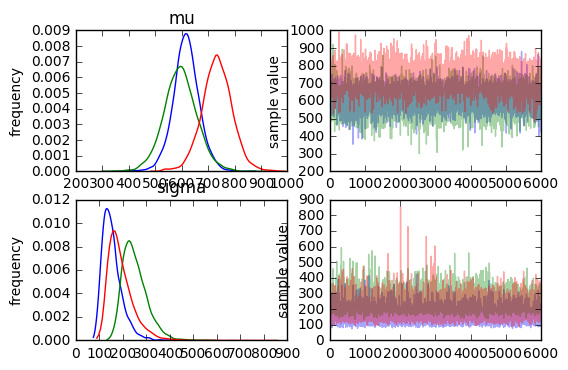

In [20]:
frame = pd.DataFrame({'milk': [651, 679, 374, 601, 401, 609, 767, 709, 704, 679, 798, 1139, 529,
                               609, 553, 743, 151, 544, 488, 555, 257, 692, 678, 675, 538, 1061,
                               721, 595, 784, 877, 562, 800, 684, 741, 516],
                     'group': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                               2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]})

data = {
    'groups': frame.group.nunique(),
    'cows': len(frame.milk),
    'group': list(frame.group),
    'milk': list(frame.milk)    
}

fit7 = pystan.stan(fit=fit6, data=data,
                   iter=3000, chains=4)
print(fit7)
fit7.plot()
plt.show()

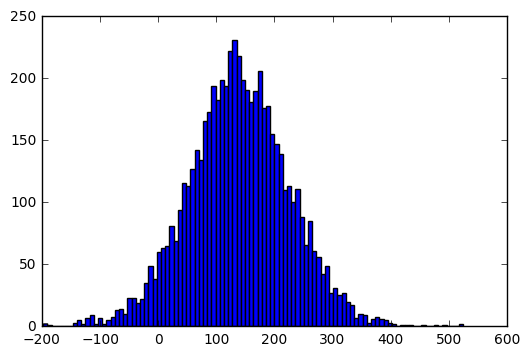

In [21]:
diet1 = fit7.extract(permuted=True)['mu'][:,0]
diet2 = fit7.extract(permuted=True)['mu'][:,2]
normal = fit7.extract(permuted=True)['mu'][:,1]

difference = diet2 - normal
plt.hist(difference, bins=100)
plt.show()

In [22]:
np.mean(difference > 0)

0.94699999999999995

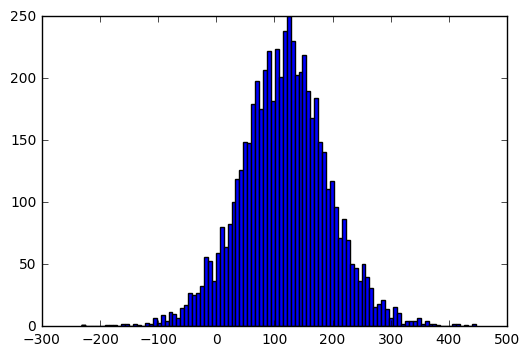

In [23]:
difference = diet2 - diet1
plt.hist(difference, bins=100)
plt.show()

In [24]:
np.mean(difference > 0)

0.93899999999999995

# 9. Cows and sunshine

Using this data on hours of sunshine and resulting liters of milk Jöns wants to know: Does sunshine affect milk production positively or negatively?

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_04711b8b8c5027fe6f26b68519b4154d NOW.


Inference for Stan model: anon_model_04711b8b8c5027fe6f26b68519b4154d.
4 chains, each with iter=3000; warmup=1500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma 221.82    0.78  38.94 161.81 194.18 216.36 243.25 312.53   2482    1.0
alpha  400.2    2.76 128.85 138.68 318.26 400.06 482.87 653.57   2183    1.0
beta1  61.95    0.36   17.1  28.68  51.01  61.92  73.07  98.24   2199    1.0
lp__  -111.8    0.03   1.22 -115.0 -112.3 -111.5 -110.9 -110.4   2021    1.0

Samples were drawn using NUTS at Sun Jan 22 12:27:19 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


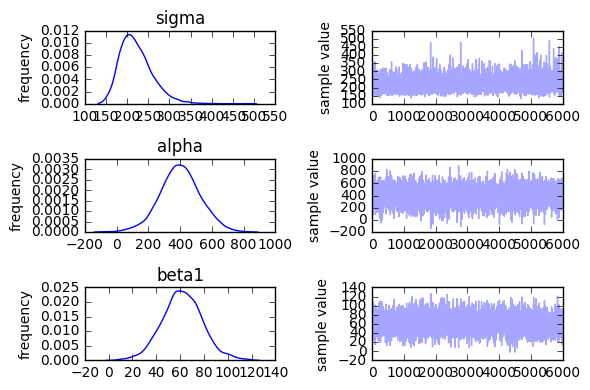

In [25]:
frame = pd.DataFrame({'milk': [685, 691, 476, 1151, 879, 725, 1190, 1107, 809, 539,
                               298, 805, 820, 498, 1026, 1217, 1177, 684, 1061, 834],
                      'hours': [3, 7, 6, 10, 6, 5, 10, 11, 9, 3, 6, 6, 3, 5, 8, 11,
                                12, 9, 5, 5]})

data = {
    'hours': len(frame.hours),
    'hour': list(frame.hours),
    'milk': list(frame.milk)
}

model = """
data {
    int hours;           // observations
    vector[hours] hour;  // hour of each observation
    vector[hours] milk;  // observed quantity of milk produced
}
parameters {
    real<lower=0> sigma;
    real alpha;
    real beta1;
}
model {
    vector[hours] mu;

    alpha ~ uniform(-1000, 1000);
    beta1 ~ uniform(-1000, 1000);
    sigma ~ uniform(0, 1000);
    mu = alpha + beta1 * hour;
    milk ~ normal(mu, sigma); 
}
"""

fit8 = pystan.stan(model_code=model, data=data,
                   iter=3000, chains=4)
print(fit8)
fit8.plot()
plt.tight_layout()
plt.figure(figsize=(10,10))
plt.show()

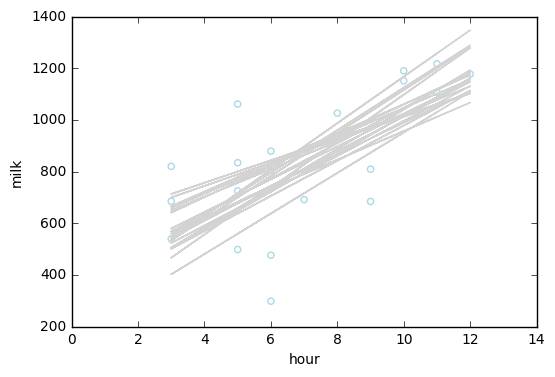

In [26]:
alpha = fit8.extract(permuted=True)['alpha'][:]
beta1 = fit8.extract(permuted=True)['beta1'][:]


plt.scatter(frame.hours, frame.milk, marker='o', facecolors='none', edgecolors='lightblue')
plt.xlim(0, 14)
for idx in np.random.choice(list(range(len(alpha))), size=20, replace=False, p=None):
    plt.plot(frame.hours, alpha[idx] + frame.hours * beta1[idx], color='lightgray')
plt.xlabel('hour')
plt.ylabel('milk')
plt.show()